# Segway Motion (Inverted Pendulum)
In this notebook, I'll explore the motion of a segway traveling over terrain plots with a target speed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%matplotlib inline

This is where I will do the analytical work....

In [3]:
### CONSTANTS

# Length of the handle
r = 1

# Bob mass
bobMass = 3

In [4]:
# Define the equations of motion of the segway. 
# This is essentially the brain of the machine.
# 
# NOTE: All motion is driven by torque about the wheel.

def accel(x, y, theta):
    """Returns the acceleration of the base along the track."""
     
    return 1;
    

In [5]:
def calc_bob_pos(x, y, theta):
    """Returns the position of the bob calculated from the state of the main wheel."""
    return (x+r*np.sin(theta), y+r*np.cos(theta))

In [24]:

def aflat_terrain(x):
    """Returns the elevation y at distance x for the flat terrain."""
    return 1

def aflat_terrain_slope(x):
    """Returns the slope of the terrain at any given x."""
    return 0

def bump_terrain(x):
    """Returns the elevation y at distance x for the simple bump terrain."""
    # Bump is from x = 12 to x = 18.
    if (x >= 12 and x <= 18):
        xp = x - 12
        return -(1/8) * xp * (xp-6) + 1
    else: 
        return 1
    
def flat_terrain(dist):
    """Returns the x and y coordinates a distance d along a flat path."""
    return (dist, 0)

def d_flat_terrain(dist):
    """Returns the slope of the path a distance d along the path."""
    return (0, 0)

def dd_flat_terrain(dist):
    """Returns the concavity of the path at a distance d along the path."""
    return (0,0)

In [25]:
#TODO This isn't quite right i think that I need to parameterize the
# path
def euler(vd, d, timeStep, theta, dtheta, terrain, dterrain, ddterrain):
    """Euler Integration routine"""
    
    # This needs to be calculated
    Ad = 1                 # Acceleration along path 
    newVd = vd + Ad * timeStep  # Velocity along path
    newD = d + newVd * timeStep   # Distance along path
    
    # x and y motion is calculated from path.
    # note the use of the chain rule on X(f(t))
    ddx = ddterrain(newD)[0] * newVd**2 + dterrain(newD)[0] * Ad # horizontal acceleration
    ddy = ddterrain(newD)[1] * newVd**2 + dterrain(newD)[1] * Ad # vertical acceleration
    
    dx = dterrain(newD)[0]*newVd 
    dy = dterrain(newD)[1]*newVd
    
    x = terrain(newD)[2]
    y = terrain(newD)[1]
    
    ddTheta = (1/r) * ( -dx*dtheta*np.sin(theta) - dy*dtheta*np.cos(theta) + g*np.sin(theta) - (ddx*np.cos(theta) - dx*dtheta*np.sin(theta)) + (ddy*np.sin(theta) - dx*dtheta*np.sin(theta)) )
    dTheta += ddTheta*timeStep
    theta += dTheta
    
    return (newVd, newD, dTheta, theta)
    

## Flat Terrain

In [26]:
# Find distance d along path such that x = 30 
timestep = 0.01
xdist = 30
d = 0
while(flat_terrain(d)[0] < xdist):
    d += 0.1

print(d)

30.000000000000156


In [27]:
# build the terrain graph with 
path = np.linspace(0, d, 300)
terrain = [flat_terrain(d) for d in path]
terrainX = [x for (x,y) in terrain]
terrainY = [y for (x,y) in terrain]

In [29]:
# plot the path of the slider
time = np.linspace(0, 10, 300)

#ics
vd = 0
d = 0
theta = 0
dtheta = 0

pos = []

for t in time:
    tmp = euler(vd, d, 0.033, flat_terrain, d_flat_terrain, dd_flat_terrain)
    pos.append(tmp)
    
    
    

return (newVd, newD, dTheta, theta)

TypeError: euler() missing 2 required positional arguments: 'dterrain' and 'ddterrain'

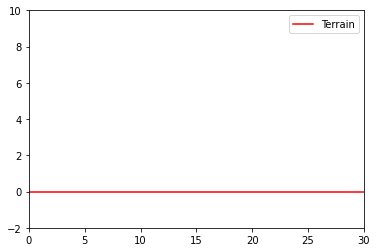

In [13]:
plt.figure()

plt.plot(terrainX, terrainY, 'r', label='Terrain')
plt.ylim([-2,10])
plt.xlim([0,30])

plt.legend()